### Jake Dineen and Mason David
### Scripting For Data Analysis
### Final Project

#### Preface
This project will center around collections of baseball data ranging from 1871 - 2014, essentially encompassing all recorded statistics over the course of the history of Major League Baseball. Sean Lahman and a group of reasearchers are responsible for the collection and storage of most of the main files we will be working with, although there have been some crowdsourcing attempts at expanding the original sets to include such things as college statistics.

#### Data
All data is available to us via a github repository. To explore some of text mining/web scraping tactics, and to exemplify some additional learned skills, we will aggregate the CSV links in using urllib and Beautfiul Soup. This will be an exercise of munging semi-structured HTML while the rest of our task involves structured, tabular data. As seen below, there are 27 different data sets available to us, but not all of them will be relevant for our project's goals.

#### Our Goal(s)
We have a number of goals associated with the project:
- Read in data directly from the web - Parse CSV links from HTML and automate a process for storing data.
- Work to map datasets together based on certain metadata. The CSV files work similar to a sql db, so we'll need to merge on keys/indices.
- Summarize descriptive statistics in a variety of ways:
    - Print out single season record holders for major statistics, along with the corresponding metrics
    - Print out All Time record holders for major statistics, along with the corresponding metrics
    - Visualize and decribe through tables/charts the way statistics and salries have changed over time
    * This work will likely focus on the use of pandas and numpy 
    - Potentially roll this up into a mini chatbot that requests a user input and outputs a result.
- Create a heirarchical binary classification problem centered on hall of fame candidacy:
    - Data munging for cleanup, as well as feature distributions.
    - Statistical Measures (Chi Square/Correlation/Multicollinearity) for dimensionality reduction
    - Function Approximation via Gradient Boosted Trees/Logit/Random Forests
        - Utilize a sigmoid or softmax activation function to output probability distribtuion for class mapping.
        - Using an interpretable model to understand feature importance/ranking/information gain. 
        - Display what drives hall of fame potential with a meaningful metric associated with it.
    - Potentially roll this up into a mini chatbot that requests a user input (statistics) and outputs the probability that they will make it to the Hall of Fame.
        
        



#### Store data sources in Variables

In [6]:
#link to gdoc: https://docs.google.com/document/d/1PJ1KdNt6EOcvMgaZidQbFdKrhnalx2JvQxEWfTbs434/edit
#https://stackoverflow.com/questions/15517483/how-to-extract-urls-from-an-html-page-in-python
url = 'https://github.com/chadwickbureau/baseballdatabank/tree/master/core'
base_url_csv = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/'

#### Extract information from HTML page
- The goal here is to pull out all of the CSVs that we'll eventually read into a structured format. It could have been done manually, but shows an understanding of webcrawling and HTML scraping.
The final variable has a list of stored links containing all of the data in csv format.

In [7]:
#from utils import get_csv_links
import urllib
from bs4 import BeautifulSoup
from IPython.core.display import display
import warnings
warnings.filterwarnings("ignore")

#from utils import get_csv_links. Stored in current working dir
# ^^ Wrap this up in a separate .py file and import it. Helper functions/Wrappers to be stored and imported


def get_csv_links(url, base_url_csv):
    print('Scraping Webpage:', url)
    link_storage = []
    html = urllib.request.urlopen(url)
    html = html.read()
    soup = BeautifulSoup(html, "lxml")
    links = soup.find_all('a')  #Find all href
    #Introduce logic to parse links containing .csv
    try:
        for tag in links:
            link = tag.get('href', None)
            if link is not None:
                if '.csv' in link:
                    link_storage.append(link)
        clean_urls = []  #instantiate
        #Looping through and adding the root URL
        clean_links = []
        #Need to extract after the last backslash
        for i in link_storage:
            clean_links.append(i.rsplit('/', 1)[-1])
        #Piecing URL strings together
        for i in clean_links:
            clean_urls.append(base_url_csv + i)
        print('Number of datasets: {}'.format(len(clean_urls)))
        return clean_urls
    except:
        print('Something went wrong')


#URL is the page that we're scraping. Base URL is the root of the final URL
data_links = get_csv_links(url, base_url_csv)
data_links

Scraping Webpage: https://github.com/chadwickbureau/baseballdatabank/tree/master/core
Number of datasets: 27


['https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AllstarFull.csv',
 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Appearances.csv',
 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AwardsManagers.csv',
 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AwardsPlayers.csv',
 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AwardsShareManagers.csv',
 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/AwardsSharePlayers.csv',
 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv',
 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/BattingPost.csv',
 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/CollegePlaying.csv',
 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Fielding.csv',
 'ht

In [83]:
#Need positions to act as a heirarchical filter
import pandas as pd
position = pd.read_csv('https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Fielding.csv')
position.columns
positions= position[['playerID', 'POS']]
positions.drop_duplicates(subset = 'playerID', inplace= True)

#### Reading in all necessary data & Munging

In [84]:
#Reading in batting csv
import pandas as pd
batting = pd.read_csv(data_links[6]) #index 6
batting.drop_duplicates(inplace = True) #No duplicate playerIDs
print('Batting dataset is {} rows by {} columns'.format(
    batting.shape[0], batting.shape[1]))
batting.head(5)


Batting dataset is 104324 rows by 22 columns


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [10]:
#Reading in pitching csv
pitching = pd.read_csv(data_links[-8]) #index 8
pitching.drop_duplicates(inplace = True) #no dupes
print('Pitching dataset is {} rows by {} columns'.format(
    pitching.shape[0], pitching.shape[1]))
pitching.head(5)

Pitching dataset is 45806 rows by 30 columns


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [11]:
#Need people csv for mapping to player names
people = pd.read_csv(data_links[-9])
print('People dataset is {} rows by {} columns'.format(people.shape[0],
                                                       people.shape[1]))
people.head(5)

#This is where we pull in/map player names form.


People dataset is 19598 rows by 24 columns


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [85]:
#Merging batting and peiple on playerID. This gives player metadata
import os
import sys
current_working_dir = os.getcwd()  #Get working dir
batting_merged = pd.merge(
    batting, people, how='left', on='playerID')  #pandas merge

batting_merged = pd.merge(batting_merged, positions, on = 'playerID')

batting_cols = batting_merged.columns  #store var for column names. Will need for dim. reduction

#Save csv in working dir
batting_merged_filename = 'batting_merged.csv'
batting_merged.to_csv(batting_merged_filename)
#Print Logs
print('File saved to {}:'.format(current_working_dir))
print('File name: {}'.format(batting_merged_filename))
print('{} has {} rows and {} columns'.format(
    batting_merged_filename, batting_merged.shape[0], batting_merged.shape[1]))
print('-----------------------------------')
print('\033[1m' + 'NA Count Distribution by Column' +
      '\033[0m')  #Display text output
print(batting_merged.isna().sum(axis=0))

#We want to get rid of all of the observations where a given name is not present.
print('-----------------------------------')
print(
    ' \033[1m Dropped {} observations where nameGiven was not registered \033[1m'.
    format(batting_merged['nameGiven'].isna().sum(axis=0)))

#Create a column that merges nameFirst and nameLast
batting_merged[
    'FullName'] = batting_merged['nameFirst'] + ' ' + batting_merged['nameLast']

#Want to drop some unnecessary columns
cols_to_drop = [
    'birthMonth', 'birthDay', 'birthState', 'birthCity', 'deathYear',
    'deathMonth', 'deathDay', 'deathState', 'deathCountry', 'deathCity',
    'finalGame', 'retroID', 'bbrefID'
]
print('-----------------------------------')
print('Dropping Unnecessary Columns')
batting_merged.drop(columns=cols_to_drop, inplace=True)
print('-----------------------------------')
#print('Filtering on Position Players Only')
#batting_merged = batting_merged[batting_merged['POS'] != 'P']
print('-----------------------------------')
print('Displaying Cleaned Batting Data')
display(batting_merged.head(5))  #Display tail of df



File saved to C:\Users\jdine\Desktop\SYracuse\Term 7\Scripting for Data Analysis\FinalProject:
File name: batting_merged.csv
batting_merged.csv has 104113 rows and 46 columns
-----------------------------------
NA Count Distribution by Column
playerID            0
yearID              0
stint               0
teamID              0
lgID              738
G                   0
AB                  0
R                   0
H                   0
2B                  0
3B                  0
HR                  0
RBI               756
SB               2368
CS              23408
BB                  0
SO               6341
IBB             36459
HBP              2817
SH               6069
SF              35926
GIDP            25310
birthYear         157
birthMonth        511
birthDay          864
birthCountry       78
birthState       2928
birthCity         412
deathYear       59093
deathMonth      59094
deathDay        59096
deathCountry    59095
deathState      59290
deathCity       59112
nameFirst

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,POS,FullName
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,Frank,Abercrombie,Francis Patterson,NaN,NaN,NaN,NaN,1871-10-21,SS,Frank Abercrombie
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,2B,Bob Addy
2,addybo01,1873,1,PH2,NaN,10,51,12,16,1,...,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,2B,Bob Addy
3,addybo01,1873,2,BS1,NaN,31,152,37,54,6,...,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,2B,Bob Addy
4,addybo01,1874,1,HR1,NaN,50,213,25,51,9,...,Bob,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,2B,Bob Addy


In [90]:
#Merging batting and peiple on playerID. This gives player metadata
pitching_merged = pd.merge(pitching, people, how='left', on='playerID')
pitching_merged = pd.merge(pitching_merged, positions, on = 'playerID')
pitching_merged = pitching_merged[pitching_merged['POS'] == 'P']

pitching_cols = pitching_merged.columns

#Save csv in working dir
pitching_merged_filename = 'pitching_merged.csv'
pitching_merged.to_csv(pitching_merged_filename)
#Print Logs
print('File saved to {}:'.format(current_working_dir))
print('File name: {}'.format(pitching_merged_filename))
print('{} has {} rows and {} columns'.format(pitching_merged_filename,
                                             pitching_merged.shape[0],
                                             pitching_merged.shape[1]))
print('-----------------------------------')
print('\033[1m' + 'NA Count Distribution by Column' +
      '\033[0m')  #Display text output
print(pitching_merged.isna().sum(axis=0))

#We want to get rid of all of the observations where a given name is not present.
print('-----------------------------------')
print(
    ' \033[1m Dropped {} observations where nameGiven was not registered \033[1m'.
    format(pitching_merged['nameGiven'].isna().sum(axis=0)))
pitching_merged.dropna(subset=['nameGiven'], inplace=True)

#Create a column that merges nameFirst and nameLast
pitching_merged[
    'FullName'] = pitching_merged['nameFirst'] + ' ' + pitching_merged['nameLast']

#Want to drop some unnecessary columns
cols_to_drop = [
    'IBB', 'SH', 'SF', 'GIDP', 'birthMonth', 'birthDay', 'birthState',
    'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry',
    'deathCity', 'finalGame', 'retroID', 'bbrefID', 'deathState'
]
print('-----------------------------------')
print('Dropping Unnecessary Columns')
pitching_merged.drop(columns=cols_to_drop, inplace=True)
print('-----------------------------------')
print('Displaying Cleaned Pitching Data')
display(pitching_merged.tail(5))  #Display tail of df

File saved to C:\Users\jdine\Desktop\SYracuse\Term 7\Scripting for Data Analysis\FinalProject:
File name: pitching_merged.csv
pitching_merged.csv has 43146 rows and 54 columns
-----------------------------------
NA Count Distribution by Column
playerID            0
yearID              0
stint               0
teamID              0
lgID               43
W                   0
L                   0
G                   0
GS                  0
CG                  0
SHO                 0
SV                  0
IPouts              0
H                   0
ER                  0
HR                  0
BB                  0
SO                  0
BAOpp            1260
ERA                79
IBB             12364
WP                  0
HBP               202
BK                  0
BFP                 5
GF                  0
R                   0
SH              16879
SF              16879
GIDP            17999
birthYear          11
birthMonth         48
birthDay           84
birthCountry        7
birthSta

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,POS,FullName
45801,wilkeaa01,2017,1,MIL,NL,1,0,3,2,0,...,Aaron,Wilkerson,Aaron Daniel,190.0,75.0,R,R,2017-09-15,P,Aaron Wilkerson
45802,willita01,2017,1,MIL,NL,0,0,5,0,0,...,Taylor,Williams,Taylor Grant,195.0,71.0,B,R,2017-09-06,P,Taylor Williams
45803,woodhu01,2017,1,TBA,AL,0,0,1,0,0,...,Hunter,Wood,Hunter Blake,165.0,73.0,R,R,2017-05-30,P,Hunter Wood
45804,woodrbr01,2017,1,MIL,NL,2,3,8,8,0,...,Brandon,Woodruff,Brandon Kyle,215.0,76.0,L,R,2017-08-04,P,Brandon Woodruff
45805,yacabji01,2017,1,BAL,AL,2,0,14,0,0,...,Jimmy,Yacabonis,James Allin,205.0,75.0,R,R,2017-06-11,P,Jimmy Yacabonis


#### Writing a program that outputs record holders for desired statistics
- Singe function for batters and pitchers
- Added support for timeslices - Done
- Basic error handling - Done
- Moved column slice out of params/arg
- Maybe add support for by player


In [91]:
# Want a program that outputs all time records
import numpy as np


def fetch_records(category, keystatistic, n=5, year=None):
    '''
    category == 'pitching' or 'hitting' str
    key statistic= Filterable stats. Ultimately ranked on this column. str dtype required
    n = Number of samples to display. Numeric value passed through.
    year = Defaults to none, meaning records are all time. Can set a numeric range between 1871-2013
    '''
    try:
        if 'batting' in category:
            #columns = The columns that run through this program. Defaults to a fixed subset. list like object passed in.
            columns = [
                'playerID', 'FullName', 'yearID', 'G', 'AB', 'R', 'H', '2B',
                '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO'
            ]
            batting_copy = batting_merged.copy()  #Create copy of df
            sliced = pd.DataFrame(
                batting_copy[columns])  #Slice df on default cols
            #Introduce Error Handling
            try:
                if year is not None:
                    sliced = sliced[sliced['yearID'] == year]
            except:
                if type(year) != int:
                    return (
                        'TypeError: Please Enter a Numeric value for the year argument'
                    )
                if year > 2017 or year < 1871:
                    return (
                        'Please enter a valid year between 1871 & 2017, inclusive'
                    )

            group = sliced.groupby(['playerID', 'FullName']).sum()
            #Have to manually create a BA column
            group['BattingAverage'] = np.round(group['H'] / group['AB'], 3)
            sort = group.sort_values(by=keystatistic, ascending=False)

            if keystatistic == 'BattingAverage':
                print('Need to reconcile this with an atbat threshold')
            sort.drop(columns=['yearID'], inplace=True)
            sort_indexed = sort[:n]
            #Deoending on parameter entry - These are print logs
            if year is None:
                timeslice = 'Alltime'
            else:
                timeslice = int(year)
            print(
                '\033[1m Displaying top 5 players sorted by {}, Timeslice = {}  \033[1m'.
                format(i, timeslice))
            print(
                '-----------------------------------------------------------------'
            )
            return sort_indexed
        elif 'pitching' in category:
            #columns = The columns that run through this program. Defaults to a fixed subset. list like object passed in.
            columns = [
                'playerID', 'yearID', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV',
                 'BAOpp', 'ERA', 'FullName'
            ]
            pitching_copy = pitching_merged.copy()  #Create copy of df
            pitching_copy.drop_duplicates(inplace=True)  #Remove duplicates
            sliced = pd.DataFrame(
                pitching_copy[columns])  #Slice df on default cols
            try:
                if year is not None:
                    sliced = sliced[sliced['yearID'] == year]
            except:
                if type(year) != int:
                    return (
                        'TypeError: Please Enter a Numeric value for the year argument'
                    )
                if year > 2017 or year < 1871:
                    return (
                        'Please enter a valid year between 1871 & 2017, inclusive'
                    )
                #Agg lets us take different measures against different vars in a group by
            group = sliced.groupby(['playerID', 'FullName']).agg({
                'W': 'sum',
                'L': 'sum',
                'G': 'sum',
                'GS': 'sum',
                'CG': 'sum',
                'SHO': 'sum',
                'SV': 'sum',
                'BAOpp': 'mean',
                'ERA': 'mean',
            })
            sort = group.sort_values(by=keystatistic, ascending=False)
            sort_indexed = sort[:n]
            if year is None:
                timeslice = 'Alltime'
            else:
                timeslice = int(year)
            print(
                '\033[1m Displaying top 5 players sorted by {}, Timeslice = {}  \033[1m'.
                format(i, timeslice))
            print(
                '-----------------------------------------------------------------'
            )
            return sort_indexed

    except:
        if KeyError:
            print('Please Check Arguments')

### Testing our Batting Program

In [148]:
#test output
keystats = ['H', 'HR', 'RBI']
#iterate through list of keystats
for i in keystats:
    display(fetch_records(category='batting',keystatistic=i, n=5, year = 2017))

 Displaying top 5 players sorted by H, Timeslice = 2017  
-----------------------------------------------------------------


,,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BattingAverage
playerID,FullName,,,,,,,,,,,,,
blackch02,Charlie Blackmon,159,644,137,213,35,14,37,104.0,14.0,10.0,65,135.0,0.331
altuvjo01,Jose Altuve,153,590,112,204,39,4,24,81.0,32.0,6.0,58,84.0,0.346
gordode01,Dee Gordon,158,653,114,201,20,9,2,33.0,60.0,16.0,25,93.0,0.308
inciaen01,Ender Inciarte,157,662,93,201,27,5,11,57.0,22.0,9.0,49,94.0,0.304
hosmeer01,Eric Hosmer,162,603,98,192,31,1,25,94.0,6.0,1.0,66,104.0,0.318


 Displaying top 5 players sorted by HR, Timeslice = 2017  
-----------------------------------------------------------------


,,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BattingAverage
playerID,FullName,,,,,,,,,,,,,
stantmi03,Giancarlo Stanton,159,597,123,168,32,0,59,132.0,2.0,2.0,85,163.0,0.281
judgeaa01,Aaron Judge,155,542,128,154,24,3,52,114.0,9.0,4.0,127,208.0,0.284
martijd02,J. D. Martinez,119,432,85,131,26,3,45,104.0,4.0,0.0,53,128.0,0.303
daviskh01,Khris Davis,153,566,91,140,28,1,43,110.0,4.0,0.0,73,195.0,0.247
gallojo01,Joey Gallo,145,449,85,94,18,3,41,80.0,7.0,2.0,75,196.0,0.209


 Displaying top 5 players sorted by RBI, Timeslice = 2017  
-----------------------------------------------------------------


,,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BattingAverage
playerID,FullName,,,,,,,,,,,,,
stantmi03,Giancarlo Stanton,159,597,123,168,32,0,59,132.0,2.0,2.0,85,163.0,0.281
arenano01,Nolan Arenado,159,606,100,187,43,7,37,130.0,3.0,2.0,62,106.0,0.309
ozunama01,Marcell Ozuna,159,613,93,191,30,2,37,124.0,1.0,3.0,64,144.0,0.312
goldspa01,Paul Goldschmidt,155,558,117,166,34,3,36,120.0,18.0,5.0,94,147.0,0.297
cruzne02,Nelson Cruz,155,556,91,160,28,0,39,119.0,1.0,1.0,70,140.0,0.288


### Testing our Pitching Program

In [95]:
keystats = ['W', 'L']
#iterate through list of keystats
for i in keystats:
    display(fetch_records(category='pitching',keystatistic=i, n=5, year=None))

 Displaying top 5 players sorted by W, Timeslice = Alltime  
-----------------------------------------------------------------


,,W,L,G,GS,CG,SHO,SV,BAOpp,ERA
playerID,FullName,,,,,,,,,
youngcy01,Cy Young,511,316,906,815,749,76,17,0.240000,2.713043
johnswa01,Walter Johnson,417,279,802,666,531,110,34,0.226667,2.348095
mathech01,Christy Mathewson,373,188,635,551,434,79,28,0.241176,2.648889
alexape01,Pete Alexander,373,208,696,599,437,90,32,0.253810,2.972381
spahnwa01,Warren Spahn,363,245,750,665,382,63,29,0.245909,3.277727


 Displaying top 5 players sorted by L, Timeslice = Alltime  
-----------------------------------------------------------------


,,W,L,G,GS,CG,SHO,SV,BAOpp,ERA
playerID,FullName,,,,,,,,,
youngcy01,Cy Young,511,316,906,815,749,76,17,0.240000,2.713043
ryanno01,Nolan Ryan,324,292,807,773,222,61,3,0.208778,3.694074
johnswa01,Walter Johnson,417,279,802,666,531,110,34,0.226667,2.348095
niekrph01,Phil Niekro,318,274,864,716,245,45,29,0.257038,4.098462
perryga01,Gaylord Perry,314,265,777,690,303,53,11,0.253960,3.396000


### On to Modeling
- Here we want to merge the hall of fame data with the batting data.
- - Typically train test split. Analyze model/model results


- Show which features are driving hall of fame propensity.

- Build a lightweight function w/ fuzzy matching on user input. User will enter a player name, and the we'll test that player's data using our trained model. Output will be probability dist.

##### Upsampling minority Class

In [165]:
import sklearn

#This step joins the hall of fame data with the batting data from above. We only need the 'inducted' var as our target.

hof = pd.read_csv(data_links[13]) #read in HOG
hof.head(5)
np.shape(hof)

columns = ['playerID', '2B', '3B', 'AB', 'BAOpp', 'BB',  'CG', 'ERA',\
       'FullName', 'G', 'GS', 'H',  'HR',  'R', 'RBI', 'SB',  'SHO', 'SO', 'SV', 'W', 'L'
           ]

merged = pd.concat(
    [batting_merged, pitching_merged], axis=0, ignore_index=True)
merged.drop_duplicates(inplace=True)

merged = pd.DataFrame(merged[columns]) #Only take relevant columns
#Group by for data aggregation
merged = merged.groupby(['playerID', 'FullName']).agg({
    '2B': 'sum',
    '3B': 'sum',
    'AB': 'sum',
    'BAOpp': 'mean',
    'BB': 'sum',
    'CG': 'sum',
    'ERA': 'mean',
    'G': 'sum',
    'GS': 'sum',
    'H': 'sum',
    'HR': 'sum',
    'R': 'sum',
    'RBI': 'sum',
    'SB': 'sum',
    'SHO': 'sum',
    'SO': 'sum',
    'SV': 'sum',
    'W': 'sum',
    'L': 'sum',
})
merged.reset_index(inplace=True)

#Clean/Binarize/Merge HOF data with our position player data
inducted = hof[hof['inducted'] == 'Y']
players_inducted = inducted[inducted['category'] == 'Player']
players_cols = ['playerID', 'inducted']
players_inducted = players_inducted[players_cols]

hall_merged = pd.merge(merged, players_inducted, how='left', on='playerID')
hall_merged['inducted'].fillna(0, inplace=True)
hall_merged['inducted'].replace('Y', 1, inplace=True)
hall_merged.fillna(0, inplace=True)

#We notice that we have a severe class imbalance problem. Only 230 players are hall of famers. We'll likely need to do some
#stratified sampling to ensure we put an equal dist. of each class in our train test split.
#hall_merged[hall_merged['inducted'] == 1].head(5)

#We bring in upsampling techniques to create class balance. In other words, we are resampling the minority class
#or our hall of fame class, with replacement, until the number of samples in class == 1 is equal to class ==0.
#This prevents us from building a model that randomly guesses the majority class each time
#https://elitedatascience.com/imbalanced-classes

#We actually shift to downsampling the majority class so that when we predict later, we aren't simply using a model
#That's memorized the entirety of the training data.
df_majority = hall_merged[hall_merged.inducted == 0]
df_minority = hall_merged[hall_merged.inducted == 1]

from sklearn.utils import resample

df_minority_upsampled = resample(
    df_majority,
    replace=True,  # sample without replacement
    n_samples=len(df_minority),  # to match minority class
    random_state=123)  # reproducible results

df_upsampled = pd.concat([df_minority, df_minority_upsampled])

X = df_upsampled.copy()
X.drop(columns=['inducted', 'playerID', 'FullName'], inplace=True)
y = df_upsampled['inducted']

##### Train Test Splits + Grid Searching hyperparams.

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.5, stratify=y)

#Item freq tells us that we are stratified. We have an equal proportion of each class in our train and test sets
from scipy.stats import itemfreq
print('Frequency in Training Set')
print('-------------------------')
print(itemfreq(ytrain))
print('Frequency in Training Set')
print('-------------------------')
print(itemfreq(ytest))

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

#instantiate parm grid
ex_param_grid = {
    "loss": ['deviance', 'exponential'],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9]
}

#Grid Search
gsExtC = GridSearchCV(
    model,
    param_grid=ex_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=4,
    verbose=1)

#Fit model / Print Score
gsExtC.fit(xtrain, ytrain)
ExtC_best = gsExtC.best_estimator_

Frequency in Training Set
-------------------------
[[  0 115]
 [  1 115]]
Frequency in Training Set
-------------------------
[[  0 115]
 [  1 115]]
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 388 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:    9.8s finished


##### Showing Our Best Model 

In [98]:
print('----------------------------------------------')
print('Below is the grid searched best estimator:')
print('----------------------------------------------')
print(gsExtC.best_estimator_)

----------------------------------------------
Below is the grid searched best estimator:
----------------------------------------------
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [99]:
print('-------------------------')
print('Model Score on test set:', np.round(ExtC_best.score(xtest, ytest), 4))
print('-------------------------')

-------------------------
Model Score on test set: 0.9043
-------------------------


In [276]:
#Here we want to merge our feature importances and features to output feat. ranking

features = list(np.round(clf.feature_importances_, 5))
column_names = ['2B', '3B', 'AB', 'BAOpp', 'BB', 'CG', 'ERA', 'G', 'GS', 'H', 'HR', 'R',
       'RBI', 'SB', 'SHO', 'SO', 'SV', 'W', 'L']

#merge lists
dictionary = dict(zip(column_names, features))

print('\tReturning Feature Ranking')
#Sort Dictionary on values
for w in sorted(dictionary, key=dictionary.get, reverse=True):
    print (w, dictionary[w])

	Returning Feature Ranking
H 0.62934
R 0.28017
G 0.03247
RBI 0.01193
HR 0.01179
AB 0.01093
SV 0.01089
BB 0.00344
3B 0.00308
2B 0.00181
SO 0.00152
SB 0.00114
ERA 0.00073
BAOpp 0.00042
GS 0.00036
CG 0.0
SHO 0.0
W 0.0
L 0.0


In [101]:
ypred = ExtC_best.predict(xtest)

print('Classification Report')
print('-------------------------')
confusion_matrix(ytest, ypred)
print(classification_report(ytest, ypred))

Classification Report
-------------------------
             precision    recall  f1-score   support

          0       0.91      0.90      0.90       115
          1       0.90      0.91      0.91       115

avg / total       0.90      0.90      0.90       230



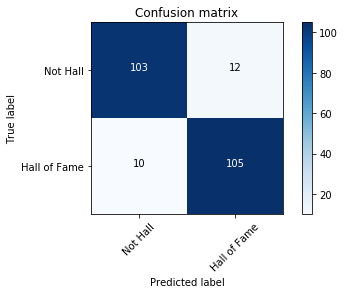

In [102]:
import itertools
import matplotlib.pyplot as plt

#Borrowed from Sklearn Docs
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(ytest, ypred)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=['Not Hall', 'Hall of Fame'])

###### Using Pickle to dump Model. This is useful so we don't have retrain our model each time we load this notebook.

In [103]:
import pickle
# now you can save it to a file
with open('ensemble_new.pkl', 'wb') as f:
    pickle.dump(ExtC_best, f)

In [104]:
# and later you can load it
with open('ensemble_new.pkl', 'rb') as f:
    clf = pickle.load(f) 

#### Now we want to create a function that takes user input on a player and outputs their probability of making the hall of fame

In [149]:
#!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import time


#Helper Function
def fuzzymatching_player(player):
    '''
    input:: User input Movie Title
    returns:: Closest Match to user input
    '''
    name = hall_merged['FullName']
    potential_matches = process.extractOne(player, name) #Takes the highest likelihood
    return str(potential_matches[0])


def hall_of_fame_projection(userinput=True, player_search=None):
    print(
        '----------------------------------------------------------------------------------------------------------------------------'
    )
    print(
        'This program takes a player name as an input, and outputs the players probability of being elected to the baseball hall of fame'
    )
    print(
        '----------------------------------------------------------------------------------------------------------------------------'
    )
    try:
        #User input parm
        if userinput == True:
            print('----------------------------')
            player = input('Please Enter a PlayerName:')
            print('----------------------------')
            playername_stringmatch = fuzzymatching_player(player)
            print('-----------------------')
            print('Predicting HOF propensity for {}'.format(
                playername_stringmatch))
            print('----------------------------')
            time.sleep(.1)

        else:
            #Manual parm entry in function instantiatiation
            player = player_search
            playername_stringmatch = fuzzymatching_player(player)
            print('Predicting HOF propensity for {}'.format(
                playername_stringmatch))
            time.sleep(.1)
        if playername_stringmatch is not None:
            with open('ensemble_new.pkl', 'rb') as f:
                clf = pickle.load(f)
            X = hall_merged.copy()
            X = hall_merged[hall_merged['FullName'] == playername_stringmatch]
            X.drop(columns=['inducted', 'playerID', 'FullName'], inplace=True)
            prob = clf.predict_proba(X)[0][1] * 100
            print('-----------------------------------')
            print(
                '\n {} has a {}% chance of making the Baseball Hall of Fame,based on stats through 2017'.
                format(playername_stringmatch, np.round(prob, 2)))

        print('\t Returning career Statistics through 2017')
        return display(
            hall_merged[hall_merged['FullName'] == playername_stringmatch])

    except:
        print('Something went wrong')

#### Using our Model for Inference

##### Testing chatbox user input
- This works pretty well.  Due to the downsampling of the majority class we performed above, this is a more viable representation of how good our model really is, since we aren't training it on the entire dataset.

In [150]:
hall_of_fame_projection(userinput=True, player_search=None)

----------------------------------------------------------------------------------------------------------------------------
This program takes a player name as an input, and outputs the players probability of being elected to the baseball hall of fame
----------------------------------------------------------------------------------------------------------------------------
----------------------------
Please Enter a PlayerName:Jim Abbot
----------------------------
-----------------------
Predicting HOF propensity for Jim Abbott
----------------------------
-----------------------------------

 Jim Abbott has a 80.19% chance of making the Baseball Hall of Fame,based on stats through 2017
	 Returning career Statistics through 2017


,playerID,FullName,2B,3B,AB,BAOpp,BB,CG,ERA,G,...,HR,R,RBI,SB,SHO,SO,SV,W,L,inducted
14,abbotji01,Jim Abbott,0.0,0.0,21.0,0.280364,620,31.0,4.496364,526,...,154,880,3.0,0.0,6.0,898.0,0.0,87.0,108.0,0


##### Testing iteration

In [151]:
players = ['Barry Bonds', 'Cy Young', 'Mike Trout', 'Bryce Harper']

for i in players:
    hall_of_fame_projection(userinput=False, player_search=i)

----------------------------------------------------------------------------------------------------------------------------
This program takes a player name as an input, and outputs the players probability of being elected to the baseball hall of fame
----------------------------------------------------------------------------------------------------------------------------
Predicting HOF propensity for Barry Bonds
-----------------------------------

 Barry Bonds has a 80.62% chance of making the Baseball Hall of Fame,based on stats through 2017
	 Returning career Statistics through 2017


,playerID,FullName,2B,3B,AB,BAOpp,BB,CG,ERA,G,...,HR,R,RBI,SB,SHO,SO,SV,W,L,inducted
1552,bondsba01,Barry Bonds,601.0,77.0,9847.0,0.0,2558,0.0,0.0,2986,...,762,2227,1996.0,514.0,0.0,1539.0,0.0,0.0,0.0,0


----------------------------------------------------------------------------------------------------------------------------
This program takes a player name as an input, and outputs the players probability of being elected to the baseball hall of fame
----------------------------------------------------------------------------------------------------------------------------
Predicting HOF propensity for Cy Young
-----------------------------------

 Cy Young has a 81.53% chance of making the Baseball Hall of Fame,based on stats through 2017
	 Returning career Statistics through 2017


,playerID,FullName,2B,3B,AB,BAOpp,BB,CG,ERA,G,...,HR,R,RBI,SB,SHO,SO,SV,W,L,inducted
18810,youngcy01,Cy Young,87.0,35.0,2960.0,0.24,1298,749.0,2.713043,1824,...,156,3492,290.0,29.0,76.0,3007.0,17.0,511.0,316.0,1


----------------------------------------------------------------------------------------------------------------------------
This program takes a player name as an input, and outputs the players probability of being elected to the baseball hall of fame
----------------------------------------------------------------------------------------------------------------------------
Predicting HOF propensity for Mike Trout
-----------------------------------

 Mike Trout has a 46.56% chance of making the Baseball Hall of Fame,based on stats through 2017
	 Returning career Statistics through 2017


,playerID,FullName,2B,3B,AB,BAOpp,BB,CG,ERA,G,...,HR,R,RBI,SB,SHO,SO,SV,W,L,inducted
17298,troutmi01,Mike Trout,200.0,40.0,3399.0,0.0,571,0.0,0.0,925,...,201,692,569.0,165.0,0.0,874.0,0.0,0.0,0.0,0


----------------------------------------------------------------------------------------------------------------------------
This program takes a player name as an input, and outputs the players probability of being elected to the baseball hall of fame
----------------------------------------------------------------------------------------------------------------------------
Predicting HOF propensity for Bryce Harper
-----------------------------------

 Bryce Harper has a 35.5% chance of making the Baseball Hall of Fame,based on stats through 2017
	 Returning career Statistics through 2017


,playerID,FullName,2B,3B,AB,BAOpp,BB,CG,ERA,G,...,HR,R,RBI,SB,SHO,SO,SV,W,L,inducted
7086,harpebr03,Bryce Harper,149.0,18.0,2756.0,0.0,455,0.0,0.0,768,...,150,507,421.0,62.0,0.0,665.0,0.0,0.0,0.0,0


### Visualizations

C:\Users\jdine\Documents\Anaconda3\envs\tensorflowlatest\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


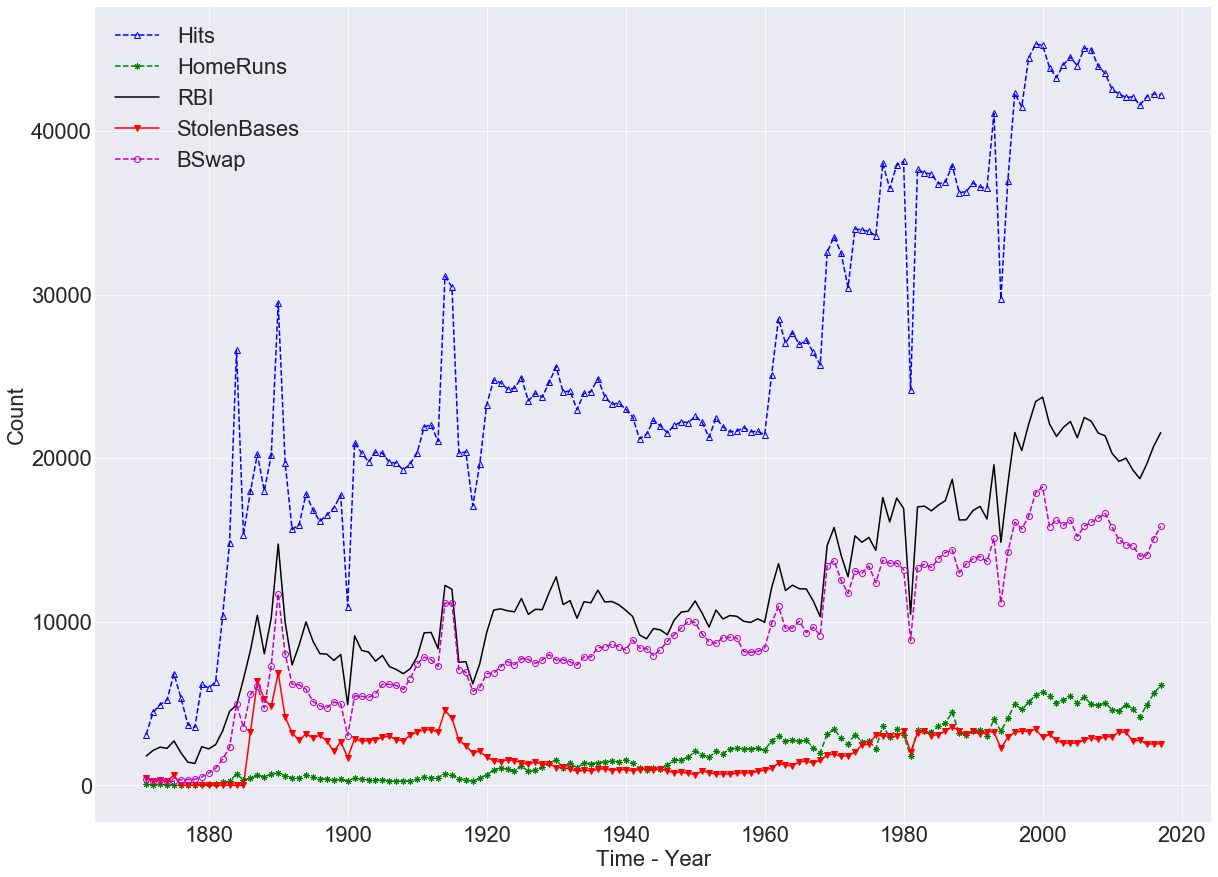

In [163]:
viz = batting_merged.groupby(['yearID']).sum()
viz.reset_index(inplace=True)
viz
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 15)
matplotlib.rcParams.update({'font.size': 22})
sns.set_style("darkgrid")
x = np.arange(6)

fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(
    viz.yearID,
    viz.H,
    c='b',
    marker="^",
    ls='--',
    label='Hits',
    fillstyle='none')
ax.plot(viz.yearID, viz.HR, c='g', marker=(8, 2, 0), ls='--', label='HomeRuns')
ax.plot(viz.yearID, viz.RBI, c='k', ls='-', label='RBI')
ax.plot(viz.yearID, viz.SB, c='r', marker="v", ls='-', label='StolenBases')
ax.plot(
    viz.yearID,
    viz.BB,
    c='m',
    marker="o",
    ls='--',
    label='BSwap',
    fillstyle='none')

plt.legend(loc=2)
plt.xlabel('Time - Year')
plt.ylabel('Count')
plt.draw()

In [248]:
columns = [
    'playerID', 'FullName', 'yearID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
    'RBI', 'SB', 'CS', 'BB', 'SO'
]
test = batting_merged.groupby(['playerID', 'FullName']).sum()

test.reset_index(inplace=True)
test = test[columns]

hall_merged = pd.merge(test, players_inducted, how='left', on='playerID')
hall_merged['inducted'].fillna(0, inplace=True)
hall_merged['inducted'].replace('Y', 1, inplace=True)
hall_merged.fillna(0, inplace=True)
hall_merged = hall_merged.groupby(['inducted']).mean()
hall_merged.reset_index(inplace=True)
hall_merged.drop(columns='yearID', inplace=True)

display(hall_merged)

,inducted,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO
0,0,265.251937,716.501950,92.931713,185.080684,31.375047,6.230510,13.870745,83.447181,14.350735,4.797863,64.727117,100.328720
1,1,1673.930435,5854.856522,947.791304,1727.195652,295.178261,74.734783,155.691304,874.286957,158.017391,36.847826,643.804348,583.021739
